In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import sklearn
%matplotlib inline

In [ ]:

test_df = pd.read_csv('/content/drive/MyDrive/Datasets_ml/student_data.csv')



In [ ]:
#original table
test_df

,Student ID,Gender,Age,Major,GPA,Extra Curricular,Num Programming Languages,Num Past Internships,Good Candidate
0,0,F,21,Statistics and Machine Learning,2.83,Sorority,4,1,0
1,1,M,20,Information Systems,2.89,Fraternity,5,3,0
2,2,F,20,Math,2.66,Teaching Assistant,3,1,0
3,3,M,20,Information Systems,2.48,Fraternity,5,0,0
4,4,F,21,Statistics and Machine Learning,3.30,Sorority,2,1,0
...,...,...,...,...,...,...,...,...,...
495,495,M,20,Computer Science,2.89,Student Government,5,0,0
496,496,F,24,Computer Science,2.53,Buggy,3,2,1
497,497,F,21,Computer Science,2.00,Sorority,3,2,0
498,498,M,22,Electrical and Computer Engineering,3.24,Men's Basketball,4,1,1


new grads with age between 20-23 is preferred


<Axes: ylabel='Student ID'>

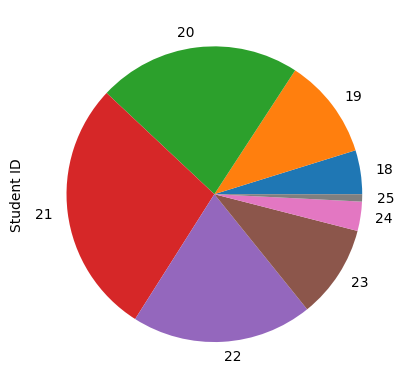

In [ ]:
#distribution across age
print("new grads with age between 20-23 is preferred")
test_df.groupby(['Age']).count()['Student ID'].plot(kind='pie')

major distribution is quite even


<Axes: ylabel='Student ID'>

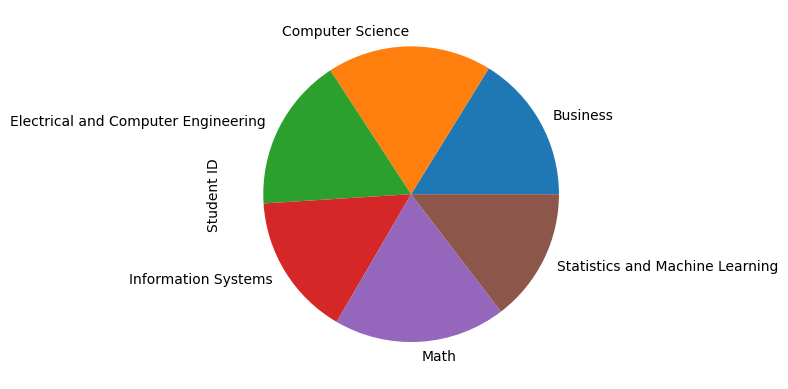

In [ ]:
#distribution across major
print("major distribution is quite even")
test_df.groupby(['Major']).count()['Student ID'].plot(kind='pie')

female count is slightly higher than male count


<Axes: xlabel='Gender'>

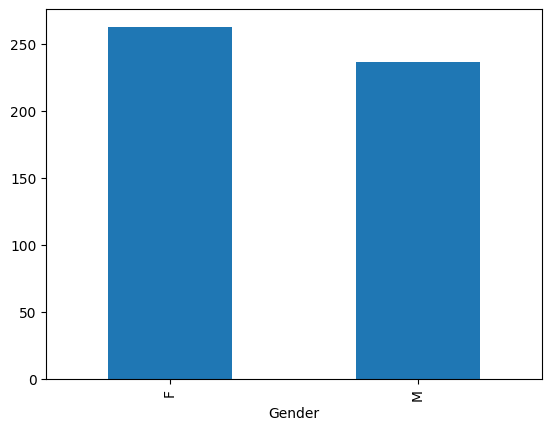

In [ ]:
#distribution across gender
print("female count is slightly higher than male count")
test_df.groupby(['Gender']).count()['Student ID'].plot(kind='bar')

the GPA varies greatly among people, but generally an GPA above 3.5 is preferred


<Axes: xlabel='GPA', ylabel='Student ID'>

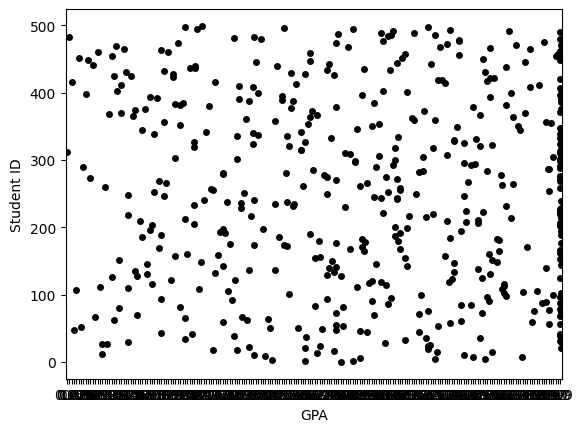

In [ ]:
#distribution across GPA
print("the GPA varies greatly among people, but generally an GPA above 3.5 is preferred")
import seaborn as sns
sns.stripplot(x='GPA', y='Student ID', data=test_df, color='black')






CS related extra curricular is slightly more preferred than others


<Axes: xlabel='Extra Curricular'>

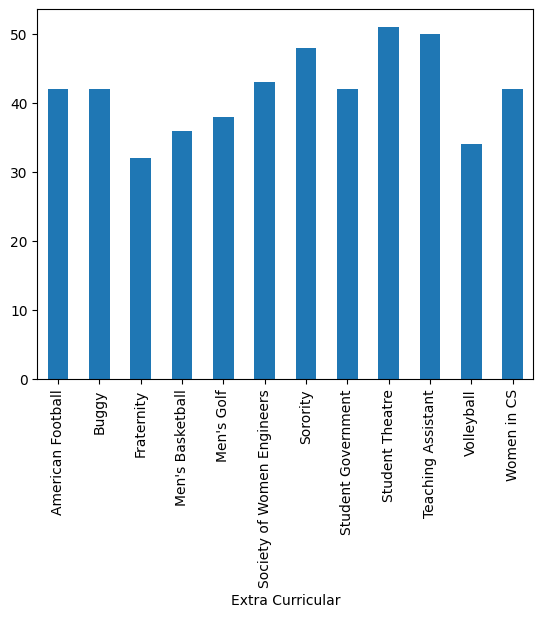

In [ ]:
#distribution across Extra Curricular
print("CS related extra curricular is slightly more preferred than others")
test_df.groupby(['Extra Curricular']).count()['Student ID'].plot(kind='bar')

For number of programming languages known it is not 'the more the better' but generally around 3 is a preferred number


<Axes: ylabel='Student ID'>

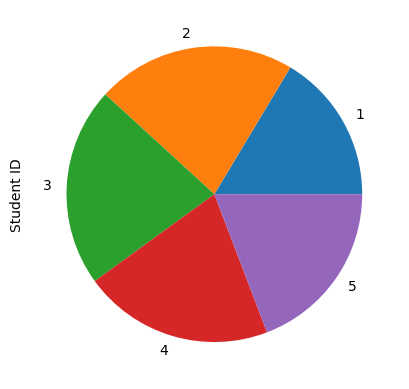

In [ ]:
#distribution across Num Programming Languages
print("For number of programming languages known it is not 'the more the better' but generally around 3 is a preferred number")
test_df.groupby(['Num Programming Languages']).count()['Student ID'].plot(kind='pie')

a number of past interns between 2-4 are preferred


<Axes: xlabel='Num Past Internships'>

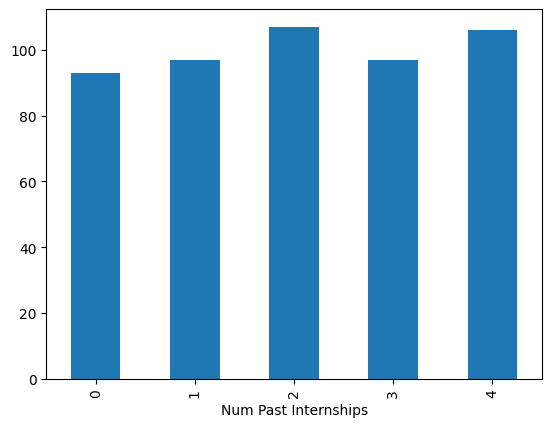

In [ ]:
#distribution across Num Past Internships
print("a number of past interns between 2-4 are preferred")
test_df.groupby(['Num Past Internships']).count()['Student ID'].plot(kind='bar')

In [ ]:
#define the inputs/outputs
test_df = test_df.drop(['Student ID'], axis=1)
X_test = test_df.drop(['Good Candidate'], axis=1)
Y_test = test_df['Good Candidate']

In [ ]:
import pickle
# import the  model
model = pickle.load(open('/content/drive/MyDrive/Datasets_ml/model.pkl','rb'))
!pip install scikit-learn==1.2.1




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#make prediction

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
report = classification_report(Y_test, y_pred)
print(report)




              precision    recall  f1-score   support

           0       0.84      0.84      0.84       263
           1       0.82      0.82      0.82       237

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



In [ ]:
#show accuracy again
from sklearn.metrics import accuracy_score

# now we can compute the accuracy of those predictions
print('Accuracy Score for model', accuracy_score(y_pred, Y_test))

Accuracy Score for model 0.832


In [ ]:
#show the confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)

tp = cm[1, 1]
tn = cm[0, 0]
fp = cm[0, 1]
fn = cm[1, 0]

# model predicted 221 positive cases correctly (true positives) and 195 negative cases correctly (true negatives), 
# but it made 42 false positive predictions (predicted positive, but actually negative) and 42 false negative predictions (predicted negative, but actually positive).
print('True positives:', tp)
print('True negatives:', tn)
print('False positives:', fp)
print('False negatives:', fn)
print(cm)



True positives: 195
True negatives: 221
False positives: 42
False negatives: 42
[[221  42]
 [ 42 195]]
